Continue working on the tree basal v5.

Removing unpublished data again. We're happy enought with gymnosperm sequences so We're keeping those. 

The major change is that we identified a clade of MIKC* sequences which we're removing. This may add power to the analysis (at least some speed) and we're not interested in those here.

I'm running trees initially with UFbootstrap and SH-alrt and later with a non-parametric tree inference.

I'm getting the basalv4 fasta, sinse this has everything I want anyway.

In [1]:
grep '>' data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta

>tr|Q5KU24|Q5KU24_COLSC MADS-box transcription factor CsMADS1 OS=Coleochaete scutata OX=3125 GN=csmads1 PE=2 SV=1
>tr|Q5KTX4|Q5KTX4_9VIRI MADS-box protein CpMADS1 (Fragment) OS=Closterium peracerosum-strigosum-littorale complex OX=34146 GN=CpMADS1 PE=2 SV=1
>cgMADS1_BAD88436
>CRM1_CAA69276
>CRM2_CAA69277
>CRM3_CAA69407
>CRM4_CAA69408
>CRM5_CAA69409
>CRM6_CAA69410
>CRM7_CAA69411
>OPM1_CAA69412
>CMADS1_AAC24492
>CMADS2_AAC24493
>CMADS3_AAC24319
>CMADS4_AAC24320
>CMADS6_AAC24325
>SmMADS6
>SmMADS4
>SmMADS3
>SmMADS2
>SmMADS10
>SmMADS1
>PPM1_Pp012G078200
>PPM2_Pp003G125000
>PpMADS1_Pp004G002000
>PpMADS_S
>PPMC5_Pp017G019900
>PPMC6_Pp014G056100
>PpMADS2_Pp012G080000
>PpMADS3_Pp003G124300
>PPM3_Pp014G086000
>PPM4_Pp001G158500
>PPM6_Pp008G025800
>PPM7_Pp017G043700
>PPMA8_Pp008G025900
>PPMA9_Pp003G124400
>PPMA11_Pp001G158400
>PPMA12_Pp004G013900
>Pp014G086100
>PI
>AP3
>AGL2_SEP1
>AGL6
>AGL8_FUL
>AGL25_FLC
>AG
>AGL12
>AGL15
>AGL17
>AGL20_SOC1
>AGL22_SVP
>AGL32_ABS
>AGL104
>AGL67
>AGL66
>AGL30
>AG

>PIVW-2000174-Ceratopteris_thalictroides
>ENQF-2004632-Lycopodium_annotinum
>JVSZ-2127811-Equisetum_hymale
>UPMJ-2018444-Pseudolycopodiella_caroliniana
>JVSZ-2014698-Equisetum_hymale
>JVSZ-2127731-Equisetum_hymale
>PIVW-2000450-Ceratopteris_thalictroides
>QMWB-2056566-Anomodon_attenuatus
>AKXB-2062983-Phaeomegaceros_coriaceus
>RDOO-2000811-Racomitrium_varium
>CBAE-2013716-Huperzia_myrisinites
>UPMJ-2005049-Pseudolycopodiella_caroliniana
>CBAE-2013582-Huperzia_myrisinites
>RDOO-2005175-Racomitrium_varium
>PIVW-2008000-Ceratopteris_thalictroides
>UPMJ-2014960-Pseudolycopodiella_caroliniana
>PIVW-2004305-Ceratopteris_thalictroides
>AKXB-2008754-Phaeomegaceros_coriaceus
>BNCU-2018766-Radula_lindenbergia
>HVBQ-2129775-Tetraphis_pellucida
>LGOW-2012213-Schistochila_sp.
>PIVW-2004303-Ceratopteris_thalictroides
>PIVW-2001491-Ceratopteris_thalictroides
>ENQF-2004631-Lycopodium_annotinum
>PIVW-2001490-Ceratopteris_thalictroides
>JPYU-2008394-Marchantia_polymorpha
>FFPD-2013100-Ceratodon_purpureu

In [2]:
wc -l data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta

531 data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta


In [32]:
wc -l data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta
wc -l data/MIKC_orthogroup_selection-basal-v5-selection-MIKCstar.txt  
grep -A 1 --no-group-separator -F -f data/MIKC_orthogroup_selection-basal-v5-selection-MIKCstar.txt \
  data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta \
  | tee removetheselines.temp | wc -l
wc -l removetheselines.temp
grep -v -f removetheselines.temp data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta \
  | tee data/MIKC_orthogroup_selection-basal-v6_guide-v4.fasta | wc -l
rm removetheselines.temp

531 data/MIKC_orthogroup_selection-basal-v5_guide-v4.fasta
(phylogenetics) 53 data/MIKC_orthogroup_selection-basal-v5-selection-MIKCstar.txt
(phylogenetics) 106
(phylogenetics) 106 removetheselines.temp
(phylogenetics) 429
(phylogenetics) (phylogenetics) 

: 1

Now I'm manually removing Azfi v2 sequences.

In [33]:
inseq='MIKC_orthogroup_selection-basal-v6_guide-v4'

(phylogenetics) 

: 1

Now let's add the Azfi annotationv2 genes in there:

In [34]:
grep '>' data/$inseq.fasta -c

188
(phylogenetics) 

: 1

Ok, that should be sufficient. Now let's allign, trim, again make sure there's only sequences with M I and K domains, and make a tree!

# aligning and trimming

In [25]:
conda activate phylogenetics

(phylogenetics) 

: 1

In [35]:
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
if    [ ! -f "./data/alignments_raw/$inseq"_aligned-mafft-linsi.fasta ]
then  einsi --thread $(nproc) data/$inseq.fasta > ./data/alignments_raw/"$inseq"_aligned-mafft-einsi.fasta
fi

(phylogenetics) outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
All-to-all alignment.
tbfast-pair (aa) Version 7.407
alg=N, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  180 / 188
done.

Progressive alignment ... 
STEP   173 /187 (thread    3) 
Reallocating (by thread 1) ..done. *alloclen = 3246
STEP   187 /187 (thread    1) 
done.
tbfast (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 4
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.

  180 / 188
Segment   1/  1    1-1812
007-0372-1 (thread    2) worse         
Converged2.
done
dvtditr (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, n

: 1

In [10]:
if    [ ! -d data/alignments_trimmed ]
then  mkdir  data/alignments_trimmed 
fi

# define appendix only once here:
trimappendix='trim-gt1'


for a in "data/alignments_raw/$inseq"_aligned*.fasta
do  appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
    if    [ ! -f data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta ]
    then  echo "trimming alignment $a"
          sed -i 's/ /_/g' $a
          trimal -in $a   \
                 -out data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".fasta \
                 -gt .1 \
                 -htmlout data/alignments_trimmed/"$inseq"_"$appendix"_"$trimappendix".html
    fi
done

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) trimming alignment data/alignments_raw/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi.fasta
(phylogenetics) 

: 1

The Final alignment looks like this, quite happy with it. 

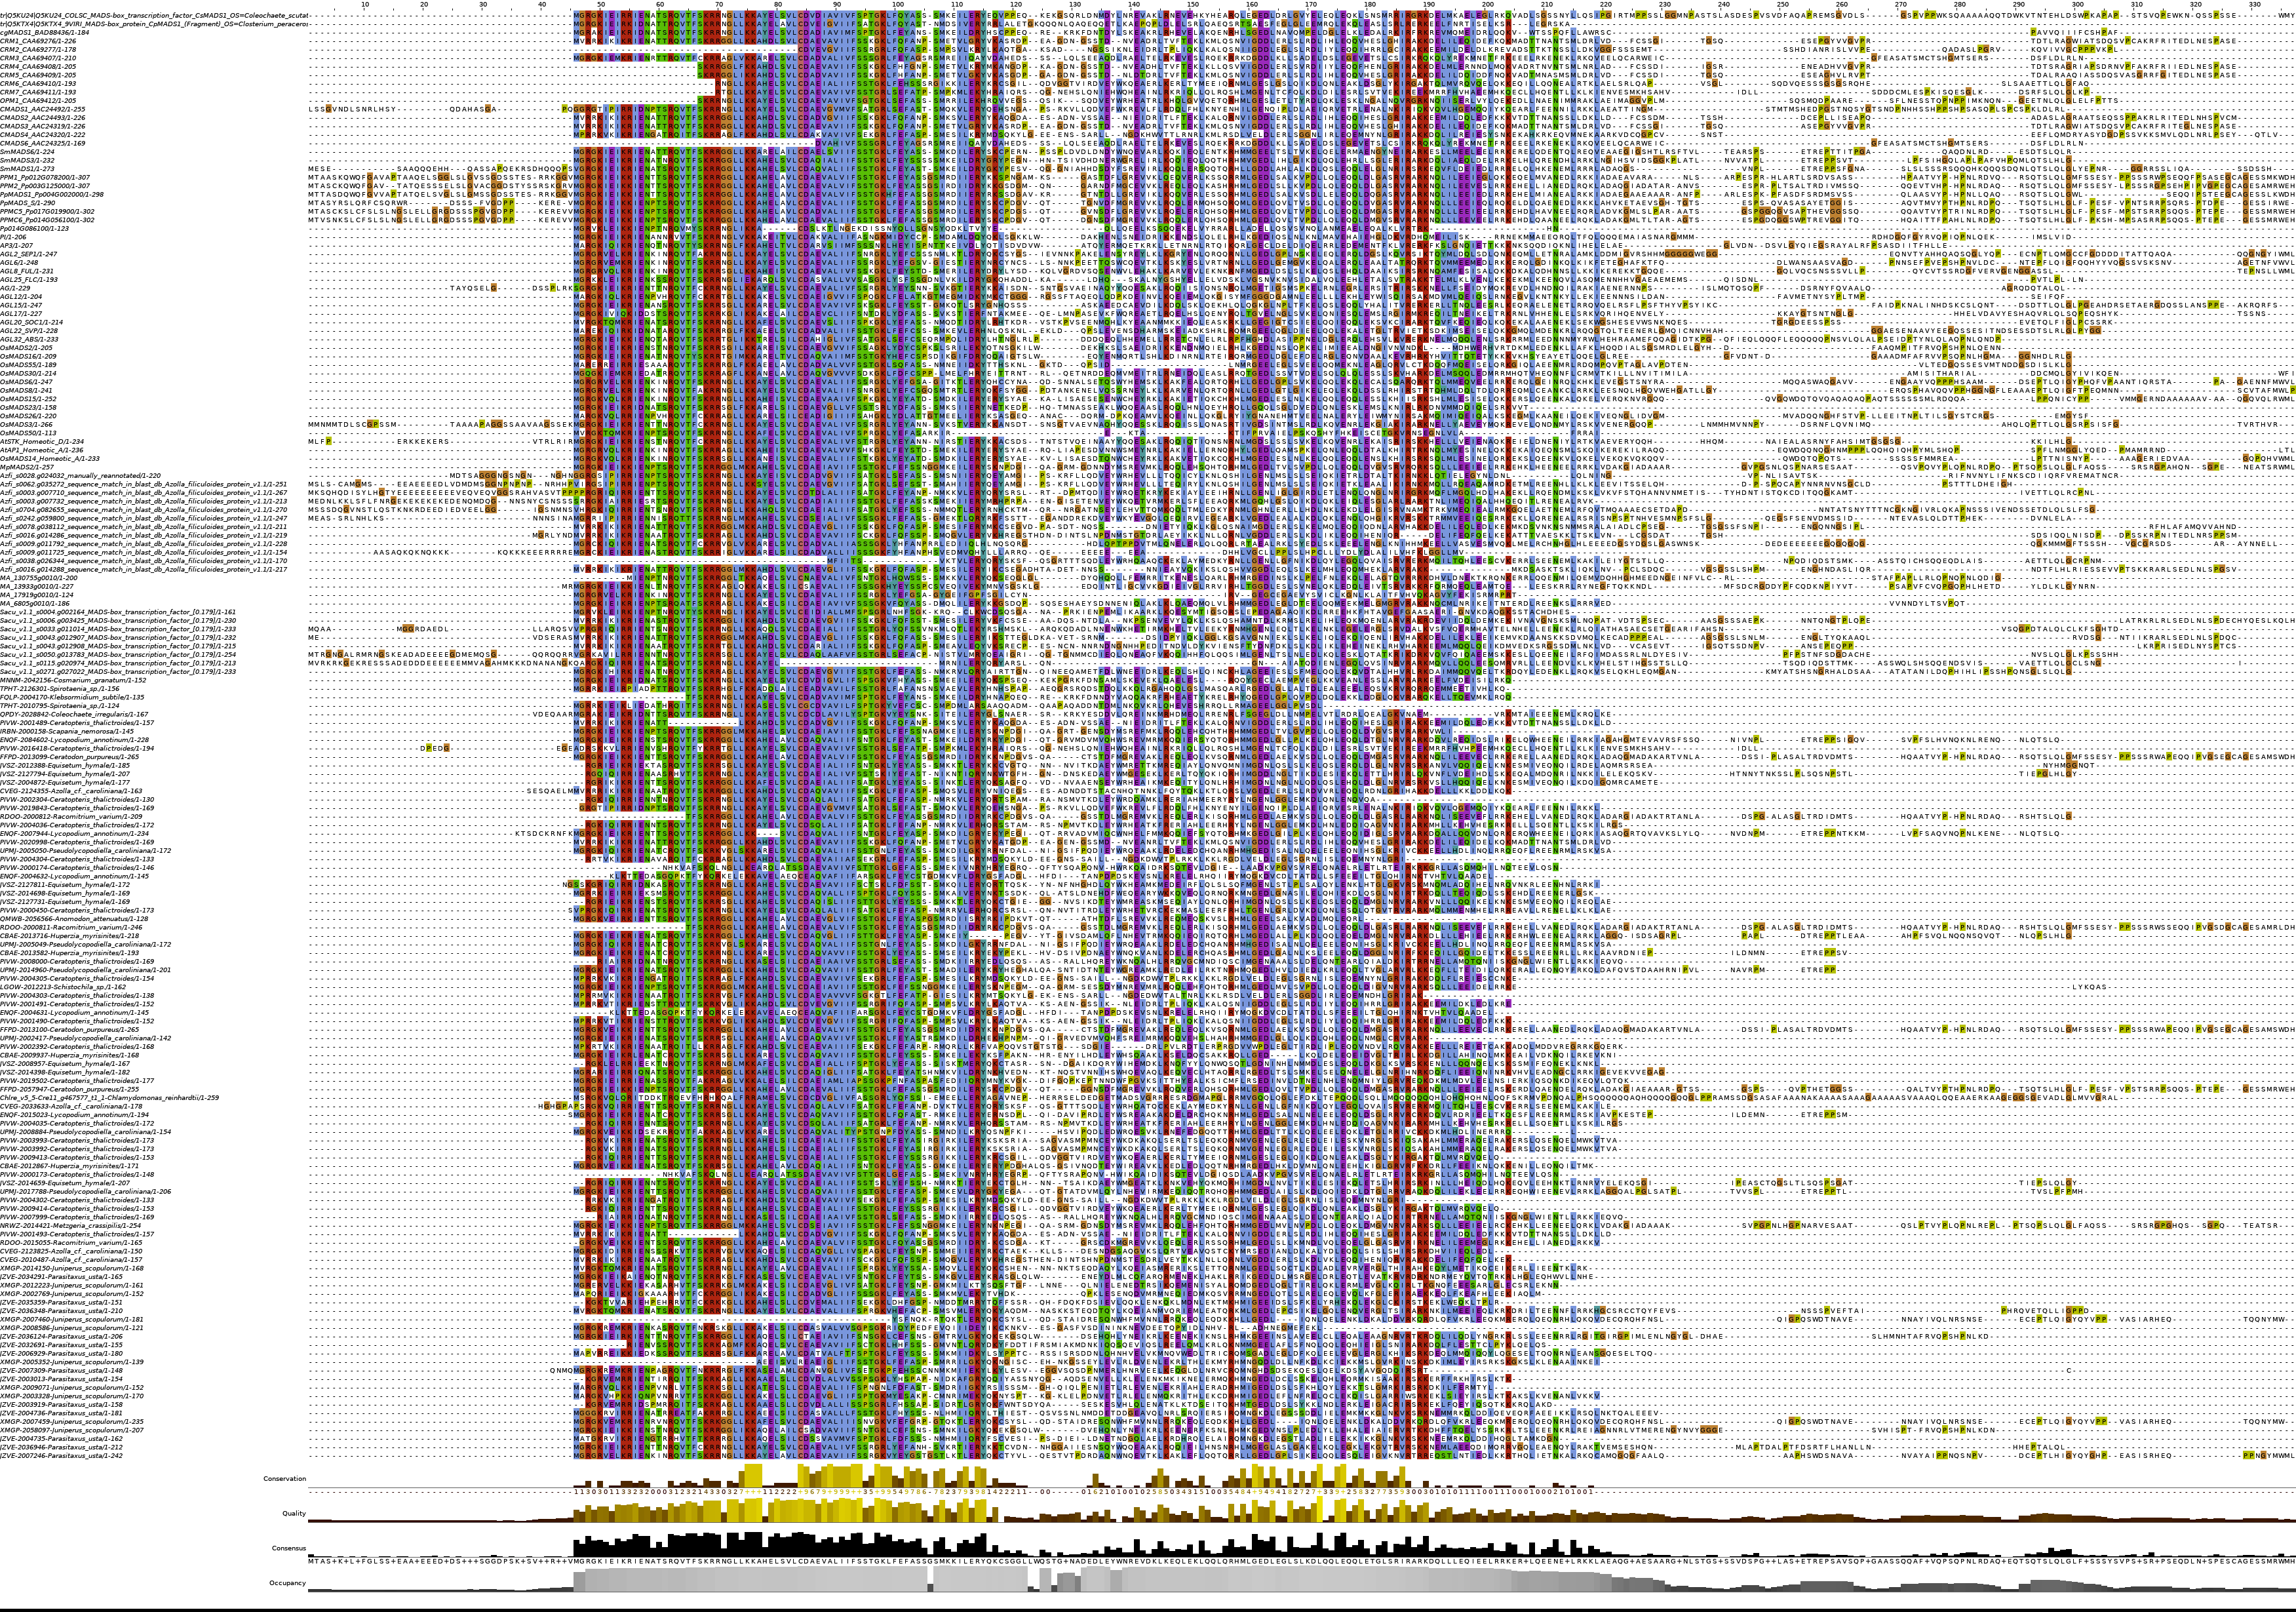


# tree inference
Now let's get to tree inference, choosing a fast bootstrapping method and reusing a model from a previous fit of a practically similar alignment.

In [1]:
inseq=MIKC_orthogroup_selection-basal-v6_guide-v4
ls data/alignments_trimmed/"$inseq"_aligned*fasta

data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1.fasta
data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta


In [2]:
conda activate phylogenetics

(phylogenetics) 

: 1

In [3]:
a=data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta

#iqpendix='iqtree-b100'
iqpendix='iqtree-LGR6-bb2000-alrt2000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f "$iqprefix".treefile ]
then nice iqtree -s $a \
                 -m 'LG+R6' \
                 -bb 2000 -alrt 2000 \
                 -nt 4 \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout && cat "$iqprefix".log | mail -s IQtree_run laura
fi

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) making a tree of file data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta
(phylogenetics) The first lines of alignment data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta look like this
(phylogenetics) >tr|Q5KU24|Q5KU24_COLSC_MADS-box_transcription_factor_CsMADS1_OS=Coleochaete_scutata_OX=3125_GN=csmads1_PE=2_SV=1
---------------------------------------------MGRGKIEIRRIENAT
SRQVTFSKRRNGLLKKAYELSVLCDVDIAVIVFSPTGKLFQYASS-SMKEILERYEQVPP
EQ--KEKGSQRLDNMDYLNREVAKLRNEVEHKYHEARQLEGEDLDRLGVYELEQLEQKLS
NSMRRIRGRKDELMKAELEGLRKQVADLSGSSNYLLQSIPGIRTMPPSSLGGMNPASTSL
ASDESPVSVDFAQAPREMSGVDLS------GSPVPPWKSQAAAAAQQTDWKVTNTEHLDS
WPKAPAP--STSVQPEWKN-QSSPSSE-------WMY
>tr|Q5KTX4|Q5KTX4_9VIRI_MADS-box_protein_CpMADS1_(Fragment)_OS=Closterium_peracerosum-strigosum-littorale_complex_OX=34146_GN=CpMADS1_P

: 1

In [ ]:
tail -n 30 $iqprefix.log

In [12]:
grep 'Best-fit model' $iqprefix.log

Best-fit model: JTT+R8 chosen according to BIC
(phylogenetics) 

: 1

In [ ]:
a=data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta

iqpendix='iqtree-MFP-b1000'
#iqpendix='iqtree-MFP-bb2000-alrt2000'

echo "making a tree of file $a"
echo "The first lines of alignment $a look like this"
head $a

file_appendix=$(echo $a | cut -d '/' -f 3- | sed "s/$inseq\_//" | sed "s/.fasta//")
echo "Making a directory $file_appendix to store trees (name based on alignment filename)"

if   [ ! -d    analyses/"$inseq"_trees/"$file_appendix" ]
then mkdir -p  analyses/"$inseq"_trees/"$file_appendix" 
fi

iqprefix=analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_"$iqpendix"
if   [ ! -f analyses/"$inseq"_trees/"$file_appendix"/"$inseq"_"$file_appendix"_iqtree-bb1000.tree ]
then nice iqtree -s $a    \
                 -m JTT+R8  \
                 -b 1000  \
                 -nt 4 \
                 -pre  "$iqprefix" \
                 2>   "$iqprefix".stderr \
                 >    "$iqprefix".stdout && cat "$iqprefix".log | mail -s IQtree_run laura
fi

(phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) (phylogenetics) making a tree of file data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta
(phylogenetics) The first lines of alignment data/alignments_trimmed/MIKC_orthogroup_selection-basal-v6_guide-v4_aligned-mafft-einsi_trim-gt1-seqrmmanual.fasta look like this
(phylogenetics) >tr|Q5KU24|Q5KU24_COLSC_MADS-box_transcription_factor_CsMADS1_OS=Coleochaete_scutata_OX=3125_GN=csmads1_PE=2_SV=1
---------------------------------------------MGRGKIEIRRIENAT
SRQVTFSKRRNGLLKKAYELSVLCDVDIAVIVFSPTGKLFQYASS-SMKEILERYEQVPP
EQ--KEKGSQRLDNMDYLNREVAKLRNEVEHKYHEARQLEGEDLDRLGVYELEQLEQKLS
NSMRRIRGRKDELMKAELEGLRKQVADLSGSSNYLLQSIPGIRTMPPSSLGGMNPASTSL
ASDESPVSVDFAQAPREMSGVDLS------GSPVPPWKSQAAAAAQQTDWKVTNTEHLDS
WPKAPAP--STSVQPEWKN-QSSPSSE-------WMY
>tr|Q5KTX4|Q5KTX4_9VIRI_MADS-box_protein_CpMADS1_(Fragment)_OS=Closterium_peracerosum-strigosum-littorale_complex_OX=34146_GN=CpMADS1_P